# Factor Analysis
**(The tool you might not be using)**

Everyone knows that you can use clustering to assign labels to the observations in your dataset.

But what if you want to assign labels to the *features*? Did you know there's a tool for that? It's called **factor analysis**, and it's commonly used in psychology research. This notebook is a quick introduction to how it works.

# The dataset

The dataset I'll be using is a fun one: The **Young People Survey** by Miroslav Sabo. It examines various personality traits as well as things that Slovakian college students like and don't like.

You can find it here:

https://www.kaggle.com/miroslavsabo/young-people-survey

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the (lightly-wrangled) data
data = pd.read_csv('responses2.csv')

# These will mess up our analysis if we keep them in the dataframe
weight = data.pop('weight')
height = data.pop('height')
age = data.pop('age')

# Remove extra column(s)
for col in data.columns:
    if 'Unnamed' in col:
        del data[col]

data.head()

,music,slow_songs_or_fast_songs,dance,folk,country,classical_music,musical,pop,rock,metal_or_hardrock,...,number_of_siblings,gender,left__right_handed,education,only_child,village__town,house__block_of_flats,i_am_always_on_time,i_lie_to_others,i_spend_a_lot_of_time_online
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,1.0,female,right handed,college/bachelor degree,no,village,block of flats,5,1,3
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,female,right handed,college/bachelor degree,no,city,block of flats,3,3,3
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,2.0,female,right handed,secondary school,no,city,block of flats,1,3,3
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,3,2,5
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,1.0,female,right handed,secondary school,no,village,house/bungalow,5,5,3


In [3]:
# Dummify the categorical variables

for i in data.columns:
    if data[i].dtype == 'O':
        dums = pd.get_dummies(data[i])
        dums.rename(columns=lambda x: str(i) + '_' + x, inplace=True)
        del data[i]
        data = pd.concat([data, dums], axis=1)

# Now that everything is numerical, let's just use the median
# for missing values.
data.fillna(data.median(), inplace=True)

data.dtypes.value_counts()

float64    131
uint8       26
int64        8
dtype: int64

# Determining the number of factors

Just like with clustering, you typically don't know how many "factors" are ideal for your data. There's going to be some trial and error here.

In psychology, it's widely accepted that there are 5 factors (or dimensions, if you prefer) of personality. So let's do a quick walkthrough with 5.

In [4]:
from sklearn.decomposition import FactorAnalysis

n_factors = 5

factor = FactorAnalysis(n_components=n_factors, random_state=1).fit(data)

# Stick it in a dataframe
factors = pd.DataFrame(factor.components_,columns=data.columns).T

# Absolute values

In a factor analysis, negative scores are just as important as positive ones. So it's helps to create new columns with absolute values.

In [5]:
# Loop through and create absolute correlations
for i in range(n_factors):
    factors['factor_' + str(i) + '_abs'] = np.abs(factors[i])

factors.head()

,0,1,2,3,4,factor_0_abs,factor_1_abs,factor_2_abs,factor_3_abs,factor_4_abs
music,-0.069289,0.069775,-0.079647,0.036091,0.090142,0.069289,0.069775,0.079647,0.036091,0.090142
slow_songs_or_fast_songs,0.069043,-0.057569,-0.152157,0.073751,-0.039089,0.069043,0.057569,0.152157,0.073751,0.039089
dance,-0.052491,0.050287,-0.477107,-0.178482,-0.045520,0.052491,0.050287,0.477107,0.178482,0.045520
folk,-0.051890,0.491406,0.147621,-0.133936,-0.029970,0.051890,0.491406,0.147621,0.133936,0.029970
country,0.081322,0.362444,0.116771,-0.048368,0.006489,0.081322,0.362444,0.116771,0.048368,0.006489


# ___
Now we can see how each factor clustered its features.

In [6]:
factors.sort_values('factor_0_abs', ascending=False)[[0]].head(10)

,0
i_cry_when_i_feel_down_or_things_dont_go_the_right_way,-0.790265
cars,0.635572
pc,0.613949
war,0.560328
reading,-0.550274
romantic,-0.540305
phobia_spiders,-0.522057
action,0.510107
shopping,-0.507094
gender_female,-0.488925


I'd call this factor "masculinity," for better or worse. We see the qualities of people who score high in this factor:

- They're not comfortable crying when they're upset.
- They like cars, computers, and war(?!).
- They don't like reading.
- They're not romantic.
- They're not afraid of spiders.
- They like action movies.
- They don't like shopping.
- They're... umm... not female.

In [7]:
factors.sort_values('factor_1_abs', ascending=False)[[1]].head(10)

,1
classical_music,0.718513
opera,0.647939
art_exhibitions,0.647370
musical_instruments,0.634725
swing_jazz,0.627336
theatre,0.606226
reading,0.587846
religion,0.553330
history,0.525101
medicine,0.521877


This happens to be a personality trait we call [**openness to experience**](https://en.wikipedia.org/wiki/Openness_to_experience)! People who score high in this trait like art, philosophy, culture, learning new things, and questioning the status quo. People who score low in this trait are conventional and old-fashioned.

In [8]:
factors.sort_values('factor_2_abs', ascending=False)[[2]].head(10)

,2
i_spend_a_lot_of_money_on_my_appearance,-0.712287
i_enjoy_going_to_large_shopping_centres,-0.683669
shopping,-0.680718
hiphop_rap,-0.637750
i_prefer_branded_clothing_to_non_branded,-0.573938
i_have_lots_of_friends,-0.505963
adrenaline_sports,-0.502618
active_sport,-0.498756
i_am_always_full_of_life_and_energy,-0.490226
dance,-0.477107


It might not be obvious, but this is actually measuring how introverted you are! A perhaps little-known fact about extraverts is that they like to go shopping more than introverts do.

This, combined with the fact that this factor is measuring how many friends you have, how much attention you like getting, and how energetic you are, makes me 100% confident that our factor analysis has discovered the personality scale of extraversion/introversion.

In [9]:
factors.sort_values('factor_3_abs', ascending=False)[[3]].head(10)

,3
phobia_dangerous_dogs,-0.549490
phobia_snakes,-0.535865
phobia_rats,-0.466462
i_have_to_be_well_prepared_before_public_speaking,-0.442625
i_worry_about_my_health,-0.429908
i_prefer_big_dangerous_dogs_to_smaller_calmer_dogs,0.421149
i_take_my_time_to_make_decisions,-0.394376
metal_or_hardrock,0.382017
adrenaline_sports,0.382013
phobia_flying,-0.380886


Again, our factor analysis has uncovered a well-known personality trait: [**neuroticism**](https://en.wikipedia.org/wiki/Neuroticism) -- or in this case, its opposite: emotional stability. Neuroticism is characterized by worrying, depression, shyness, and other negative emotions.

People who score high on this factor are not afraid of:
- Dogs
- Snakes
- Rats
- Public speaking
- Their health
- Extreme sports
- Flying

Surprisingly, they're not afraid of heavy metal either.

In [10]:
factors.sort_values('factor_4_abs', ascending=False)[[4]].head(10)

,4
i_wish_i_could_change_the_past_because_of_the_things_i_have_done,0.441551
i_feel_lonely_in_life,0.421935
i_am_always_on_time,-0.415737
phobia_aging,0.390074
alternative,0.382044
i_find_it_very_difficult_to_get_up_in_the_morning,0.381576
i_have_damaged_things_in_the_past_when_angry,0.369180
i_can_fall_for_someone_very_quickly_and_then_completely_lose_interest,0.323242
i_am_always_full_of_life_and_energy,-0.320402
i_spend_a_lot_of_money_on_my_appearance,0.319880


Notice these scores aren't as high as, say, factors 1 or 2. This, combined with the fact we seem to be seeing questions that measure **neuroticism** again, means that 5 factors probably won't work with the data set in its current form. (This is probably because it discovered masculinity as a personality trait, when it's really more of a gender/cultural phenomenon.)

Now let's look at how we can determine the right number of factors...

# How many factors should we use?

Here's how I currently determine the ideal number of factors. It's based more on logic and intuition than any rigorous mathematical formula. If you can suggest a better way to do this, then by all means let me know!

In [11]:
# We're going to test a range of factors from 2 to 20.
for i in range(2,20):
    
    # Fit to "i" factors
    factor = FactorAnalysis(n_components=i, random_state=1).fit(data)
    
    # Put it in a dataframe
    factors = pd.DataFrame(factor.components_,columns=data.columns)
    
    # See below; these next 2 lines are the tricky part.
    factors = np.abs(factors) # (1)
    print(i, factors.max().std()) # (2, 3)

2 0.1833894050740146
3 0.1861102601907512
4 0.18036507597042742
5 0.17540042433118286
6 0.17229366846403388
7 0.17081622266627128
8 0.17535749296503936
9 0.173490197509408
10 0.1990376055609941
11 0.19880258997370837
12 0.19798938733733332
13 0.1945327608205161
14 0.19236123781781797
15 0.1931380974087828
16 0.1920846790237207
17 0.19368949754259598
18 0.19244233040624092
19 0.18980734558325224


The idea is that we want to look at:
    
1. The absolute values, since negative numbers are just as relevant.
2. The maximum value for each factor -- `.max()` -- to see how strong it is overall.
3. How similar the max scores are: `.std()`. If some max scores are high and others are low, then the factors aren't effectively segregating the features.

From this, it would appear that the ideal number of factors is **7**. So let's try another factor analysis with 7 factors instead of 5.

In [12]:
n_factors = 7

factor = FactorAnalysis(n_components=n_factors, random_state=1).fit(data)

# Stick it in a dataframe
factors = pd.DataFrame(factor.components_,columns=data.columns).T

col_names = []
for i in range(n_factors):
    # We'll need non-zero factor values for our next
    # step, so we'll start counting at 1
    col_names.append('factor_' + str(i + 1))
factors.columns = col_names

# Loop through and create absolute values
for i in range(1, n_factors + 1):
    factors['factor_' + str(i) + '_abs'] = np.abs(factors['factor_' + str(i)])

In [13]:
factors.sort_values('factor_1_abs', ascending=False)[['factor_1']].head(10)

,factor_1
village__town_city,-0.455829
village__town_village,0.454216
house__block_of_flats_house/bungalow,0.297716
house__block_of_flats_block of flats,-0.295154
i_believe_in_god,0.241639
religion,0.203041
gardening,0.185879
i_believe_that_bad_people_will_suffer_one_day_and_good_people_will_be_rewarded,0.169044
folk,0.160796
phobia_dangerous_dogs,0.156859


Iiiinteresting! I'm already surprised. I'd call this factor "**old-fashionedness**," which is basically the opposite of openness to experience.

People who score high in this factor grew up in a village. To a lesser extent, they also tend to be religious.

And they're more afraid of dogs. Go figure.

In [14]:
factors.sort_values('factor_2_abs', ascending=False)[['factor_2']].head(10)

,factor_2
i_cry_when_i_feel_down_or_things_dont_go_the_right_way,-0.790182
cars,0.635669
pc,0.615333
war,0.559943
reading,-0.551425
romantic,-0.540087
phobia_spiders,-0.520156
action,0.510061
shopping,-0.506492
gender_female,-0.488814


**Masculinity**, again.

In [15]:
factors.sort_values('factor_3_abs', ascending=False)[['factor_3']].head(10)

,factor_3
classical_music,0.721761
art_exhibitions,0.660537
opera,0.653973
swing_jazz,0.643868
musical_instruments,0.628233
theatre,0.618520
reading,0.589402
history,0.532631
religion,0.518586
rock_n_roll,0.516038


**Openness to experience**.

In [16]:
factors.sort_values('factor_4_abs', ascending=False)[['factor_4']].head(10)

,factor_4
i_spend_a_lot_of_money_on_my_appearance,-0.700830
i_enjoy_going_to_large_shopping_centres,-0.674929
shopping,-0.672445
hiphop_rap,-0.641002
i_prefer_branded_clothing_to_non_branded,-0.565130
i_have_lots_of_friends,-0.510074
adrenaline_sports,-0.503068
active_sport,-0.497505
i_am_always_full_of_life_and_energy,-0.492630
dance,-0.484898


**Introversion**.

In [17]:
factors.sort_values('factor_5_abs', ascending=False)[['factor_5']].head(10)

,factor_5
phobia_dangerous_dogs,-0.540014
phobia_snakes,-0.532360
phobia_rats,-0.465980
i_worry_about_my_health,-0.448821
i_have_to_be_well_prepared_before_public_speaking,-0.448567
i_prefer_big_dangerous_dogs_to_smaller_calmer_dogs,0.438203
adrenaline_sports,0.415307
i_take_my_time_to_make_decisions,-0.405171
i_always_make_a_list_so_i_dont_forget_anything,-0.404241
i_cry_when_i_feel_down_or_things_dont_go_the_right_way,-0.382762


This seems to be **neuroticism**, but the list-making characteristic is out of place.

In [18]:
factors.sort_values('factor_6_abs', ascending=False)[['factor_6']].head(10)

,factor_6
i_wish_i_could_change_the_past_because_of_the_things_i_have_done,0.429520
i_find_it_very_difficult_to_get_up_in_the_morning,0.410798
i_am_always_on_time,-0.408202
alternative,0.403206
i_feel_lonely_in_life,0.391110
i_try_to_do_tasks_as_soon_as_possible_and_not_leave_them_until_last_minute,-0.376304
phobia_aging,0.369985
i_have_damaged_things_in_the_past_when_angry,0.365754
rock,0.334066
i_spend_a_lot_of_money_on_partying_and_socializing,0.331614


This is the factor that confounds me as a psychologist. It mostly seems to relate to the personality trait of [**conscientiousness**](https://en.wikipedia.org/wiki/Conscientiousness), which is how organized and responsible you are.

But it also contains aspects of neuroticism, like feeling lonely. My hypothesis here, which is based on related research, is that neuroticism and depression tends to make people less conscientious.

So, it's not *totally* unexpected, but it does mean our dataset is a little less predictable than we'd like it to be. That's the real world for ya.

In [19]:
factors.sort_values('factor_7_abs', ascending=False)[['factor_7']].head(10)

,factor_7
pc,-0.487422
scifi,-0.387799
horror,-0.368307
thriller,-0.354775
action,-0.353253
science_and_technology,-0.349587
mathematics,-0.342023
internet,-0.316915
i_spend_a_lot_of_money_on_gadgets,-0.285588
punk,-0.284987


In keeping with personality theory, I expected this factor to be [**agreeableness**](https://en.wikipedia.org/wiki/Agreeableness), or how nice you are. But instead it seems to be "nerdiness" (or a lack thereof). Psychological research shows this is strongly correlated with openness, but in our data set it's not...

In [20]:
nerdiness = data['pc'] + data['scifi'] + data['i_spend_a_lot_of_money_on_gadgets']
openness = data['classical_music'] + data['art_exhibitions'] + data['theatre']

np.corrcoef(nerdiness, openness)[0,1]

-0.074003833147071152

Go figure.

Let's look at one more neat thing you can do: label each feature by its factor number.

# Getting the factor of each question

This first step is pretty unintuitive, but it works. We don't want to pull the absolute value in the following step if the value is *already* positive. (Long story short, it can lead to errors in our for-loop.) Therefore, we're setting all absolute values of positive numbers to zero.

If it doesn't make sense, you'll just have to trust me on this. It works, and it prevents a lot of potential headaches.

In [21]:
for col in factors.columns[:n_factors]:
    factors[col + '_abs'] = np.where(factors[col] > 0, 0, factors[col + '_abs'])
    
factors.head(1)

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,factor_1_abs,factor_2_abs,factor_3_abs,factor_4_abs,factor_5_abs,factor_6_abs,factor_7_abs
music,-0.000194,-0.069191,0.073007,-0.078918,0.023781,0.097183,-0.092173,0.000194,0.069191,0.0,0.078918,0.0,0.0,0.092173


In [22]:
factor_dict = {}

# Loop through the questions
for i in factors.T.columns:
    # Find the top-scoring factor for each question
    # This is why we zeroed out the positive absolute values
    factor_dict[i] = factors.T.sort_values(i, ascending=False).index[0]
    
    
for k,v in factor_dict.items():
    # Because of the zeroing we did a moment ago, we now know
    # for certain if the question is negatively phrased or not.
    if "abs" in str(v):
        # Record it as negatively phrased,
        # which we'll denote with a negative sign
        factor_dict[k] = -int(v[7])
    else:
        factor_dict[k] = int(v[7])

In [23]:
item_factors = pd.DataFrame([factor_dict]).T

# Again, we need absolute values.
item_factors['absol'] = np.abs(item_factors[0])

In [24]:
item_factors.sort_values('absol')[[0]]

,0
house__block_of_flats_block of flats,-1
village__town_village,1
village__town_city,-1
number_of_siblings,1
house__block_of_flats_house/bungalow,1
pc,2
fantasyfairy_tales,-2
left__right_handed_right handed,-2
left__right_handed_left handed,2
gender_female,-2


Notice that we can now see easily see which questions tend to get opposite responses. For instance:

- Did you grow up in a city, and did you grow up in a village?
- Do you like westerns, and do you like hanging out with children?
- Do you feel lonely, and do you abstain from alcohol?
- Do you have a doctorate, and do you like cartoons?

This is also why we started counting our factors at 1 instead of zero. We needed to be able to see negative vs. positive values.

# Why does factor analysis matter?

I find it useful when dealing with psychometric (psychology-related) data. The *way* you ask questions can matter a lot, so identifying distinct factors can help you "smooth out" your data by taking the averages of several related questions.

Let's look at an example.

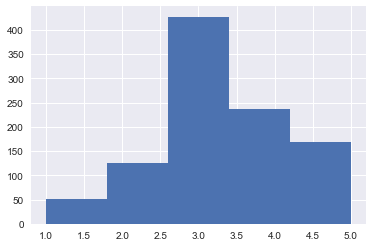

In [25]:
data['i_have_lots_of_friends'].hist(bins=5)

This data is pretty low-resolution, wouldn't you say? So let's rename it "extraversion" and combine it with similar questions.

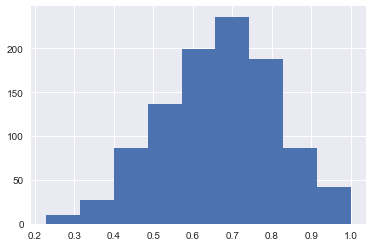

In [26]:
extraversion_scores =\
data['i_have_lots_of_friends'] +\
data['i_am_always_full_of_life_and_energy'] +\
data['i_spend_a_lot_of_money_on_my_appearance'] +\
data['shopping'] +\
data['i_enjoy_going_to_large_shopping_centres'] +\
data['adrenaline_sports'] +\
data['active_sport']

# Re-scale
extraversion_scores = extraversion_scores/extraversion_scores.max()

extraversion_scores.hist(bins=9)

Suddenly we have a much clearer idea of how extraverted someone is, rather than relying on just one question.

But there's one more alternative: you can simply look at correlated questions and add those together.

In [27]:
friends = pd.DataFrame([data.corrwith(data['i_have_lots_of_friends'])]).T

# Again, we need absolute values
friends['absol'] = np.abs(friends[0])

friends.sort_values('absol', ascending=False).head(10)

,0,absol
i_have_lots_of_friends,1.000000,1.000000
i_am_always_full_of_life_and_energy,0.394101,0.394101
i_have_many_different_hobbies_and_interests,0.372064,0.372064
fun_with_friends,0.359554,0.359554
i_enjoy_meeting_new_people,0.328416,0.328416
i_am_completely_happy_with_my_life,0.320334,0.320334
i_feel_lonely_in_life,-0.316991,0.316991
i_believe_all_my_personality_traits_are_positive,0.276272,0.276272
i_can_quickly_adapt_to_a_new_environment,0.272181,0.272181
i_spend_a_lot_of_money_on_partying_and_socializing,0.261234,0.261234


So we can also do something like this. Notice that you can reverse-score the negative correlations.

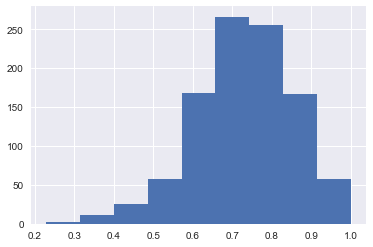

In [28]:
extraversion_scores_2 =\
data['i_have_lots_of_friends'] +\
data['i_am_always_full_of_life_and_energy'] +\
data['i_have_many_different_hobbies_and_interests'] +\
data['fun_with_friends'] +\
data['i_enjoy_meeting_new_people'] +\
data['i_am_completely_happy_with_my_life'] +\
(6 - data['i_feel_lonely_in_life']) # reverse-scored (important!)

# Re-scale
extraversion_scores_2 = extraversion_scores_2/extraversion_scores_2.max()

extraversion_scores_2.hist(bins=9)

Similar results!

That wraps up my introduction to factor analysis. Hope you found it useful!